# TO RUN
1. Make sure you installed all the dependencies
2. open **'init_notebook.py'** and change the **projectFolder** to the src folder of the repository.
3. In the following cell change the dataDir to the data directory of the InD dataset

In [1]:
dataDir = "E:/AV/DataSetExploration/drone-dataset-tools/data/location-2/home"
# dataDir = "D:/AV/DataSetExploration/drone-dataset-tools/data/location-2/lab"

In [2]:
exec(open('init_notebook.py').read())

current working dirE:\AV\DataSetExploration\TTI-dataset-tools\src


In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

from tti_dataset_tools.TrajectoryTransformer import TrajectoryTransformer
from tti_dataset_tools.TrajectoryVisualizer import TrajectoryVisualizer
from tti_dataset_tools.TrajectoryCleaner import TrajectoryCleaner
from tti_dataset_tools.ColMapper import ColMapper

In [5]:
sceneId = 10
date = "2022-12-09"
fps=5
minYDisplacement = 5
maxXDisplacement = 6
pedDf = pd.read_csv(os.path.join(dataDir, f"{date}-fps-{fps}-scene-{sceneId}-pedestrians.csv"))
otherDf = pd.read_csv(os.path.join(dataDir, f"{date}-fps-{fps}-scene-{sceneId}-others.csv"))
tracksMeta = pd.read_csv(os.path.join(dataDir, f"{date}-fps-{fps}-scene-{sceneId}-meta.csv"))

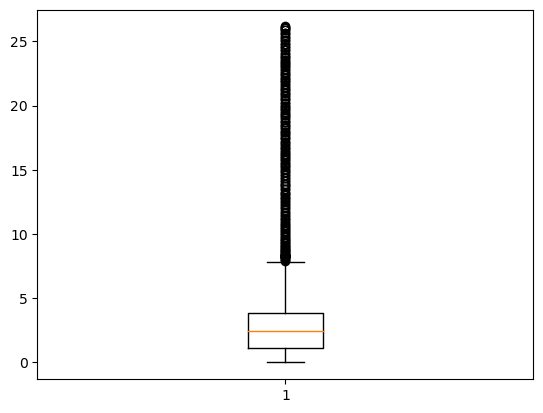

{'whiskers': [<matplotlib.lines.Line2D at 0x24a2eb19220>,
 'caps': [<matplotlib.lines.Line2D at 0x24a2eb19760>,
 'boxes': [<matplotlib.lines.Line2D at 0x24a2eb05f40>],
 'medians': [<matplotlib.lines.Line2D at 0x24a2eb19ca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x24a2eb19f40>],
 'means': []}

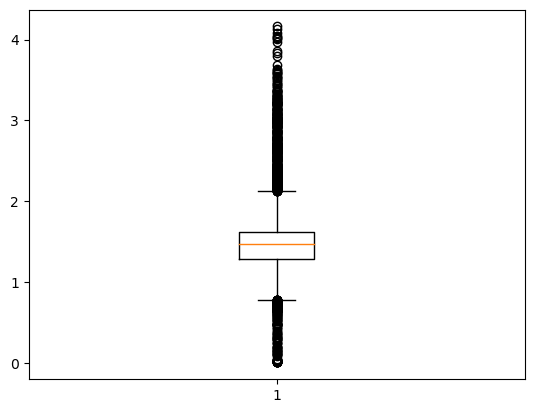

In [6]:
visualizer = TrajectoryVisualizer()
colMapper = ColMapper(
        idCol='uniqueTrackId', 
        xCol='sceneX', 
        yCol='sceneY',
        xVelCol='sceneXVelocity', 
        yVelCol='sceneYVelocity', 
        speedCol='speed'
    )
transformer = TrajectoryTransformer(colMapper)
cleaner = TrajectoryCleaner(
    colMapper = colMapper,
    minSpeed = 0.0, # we can consider them as obstacles
    maxSpeed = 3.5,
    minYDisplacement = minYDisplacement,
    maxXDisplacement = maxXDisplacement
)
transformer.deriveSpeed(pedDf)
transformer.deriveDisplacements(pedDf)
plt.boxplot(pedDf['displacementY'])
plt.show()
plt.boxplot(pedDf['speed'])

In [13]:
cleanPedDf = cleaner.cleanByYDisplacement(pedDf, byIQR=False)
# visualizer.show(pedDf, idCol = 'uniqueTrackId', xCol = 'sceneX', yCol = 'sceneY')
# visualizer.show(cleanPedDf, idCol = 'uniqueTrackId', xCol = 'sceneX', yCol = 'sceneY')
allPedIds = list(cleanPedDf["uniqueTrackId"].unique())
transformer.translateAllToLocalSource(cleanPedDf)

southIds = []
for pedId in allPedIds:
    trackDf = cleanPedDf[cleanPedDf["uniqueTrackId"] == pedId]
    trackMeta = tracksMeta[tracksMeta["uniqueTrackId"] == pedId].iloc[0]
    # print(trackMeta['verticalDirection'])
    if trackMeta['verticalDirection'] == "SOUTH":
        southIds.append(pedId)
        # print(trackMeta["uniqueTrackId"])
        X, Y = transformer.rotate(trackDf)
        cleanPedDf.loc[cleanPedDf["uniqueTrackId"] == pedId, 'localX'] = X
        cleanPedDf.loc[cleanPedDf["uniqueTrackId"] == pedId, 'localY'] = Y


using min Y displacement (5)


In [21]:

startingDf = cleanPedDf[cleanPedDf["displacementY"] < 1].copy()
startingDf.head(10)

,recordingId,frame,uniqueTrackId,sceneId,roadWidth,sceneX,sceneY,sceneXVelocity,sceneYVelocity,sceneXAcceleration,sceneYAcceleration,speed,displacementX,displacementY,localX,localY
0,18,751,18023,10,5.0,0.633506,2.406819,-0.124725,1.197404,-0.200707,-0.049552,1.203882,0.000000,0.000000,-0.000000,-0.000000
1,18,756,18023,10,5.0,0.653314,2.163065,-0.099043,1.218770,-0.128407,-0.106831,1.222788,0.019809,0.243754,-0.019809,0.243754
2,18,761,18023,10,5.0,0.674600,1.919279,-0.106426,1.218930,0.036911,-0.000799,1.223567,0.041094,0.487540,-0.041094,0.487540
3,18,766,18023,10,5.0,0.701232,1.674626,-0.133163,1.223264,0.133686,-0.021670,1.230490,0.067726,0.732193,-0.067726,0.732193
4,18,771,18023,10,5.0,0.728331,1.426538,-0.135494,1.240441,0.011656,-0.085887,1.247819,0.094825,0.980281,-0.094825,0.980281
50,18,2696,18053,10,5.0,0.857354,2.336601,0.045148,1.059391,1.010939,-0.402157,1.060352,0.223848,0.070218,-0.000000,-0.000000
51,18,2701,18053,10,5.0,0.885137,2.110236,-0.138919,1.131822,0.920336,-0.362158,1.140316,0.251632,0.296582,-0.027784,0.226364
52,18,2706,18053,10,5.0,0.925876,1.857610,-0.203694,1.263128,0.323873,-0.656531,1.279447,0.292370,0.549208,-0.068523,0.478990
53,18,2711,18053,10,5.0,0.949118,1.586989,-0.116209,1.353108,-0.437424,-0.449896,1.358089,0.315612,0.819830,-0.091764,0.749612
75,18,4180,18069,10,5.0,0.535340,2.368113,-0.457393,1.472568,0.234670,-0.294592,1.541968,0.098166,0.038705,-0.000000,-0.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x24a2f72d0d0>,
 'caps': [<matplotlib.lines.Line2D at 0x24a2f731730>,
 'boxes': [<matplotlib.lines.Line2D at 0x24a2f72d2e0>],
 'medians': [<matplotlib.lines.Line2D at 0x24a2f7313a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x24a2f731ac0>],
 'means': []}

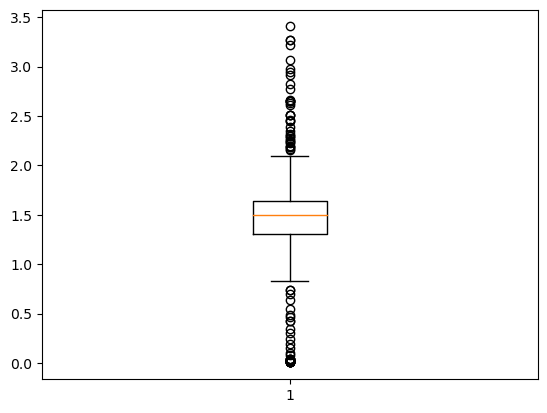

In [15]:
plt.boxplot(startingDf["speed"])

In [16]:
# get the pedestrians who started at almost 0 speed.
# get pedestrians who started at almost the median speed.


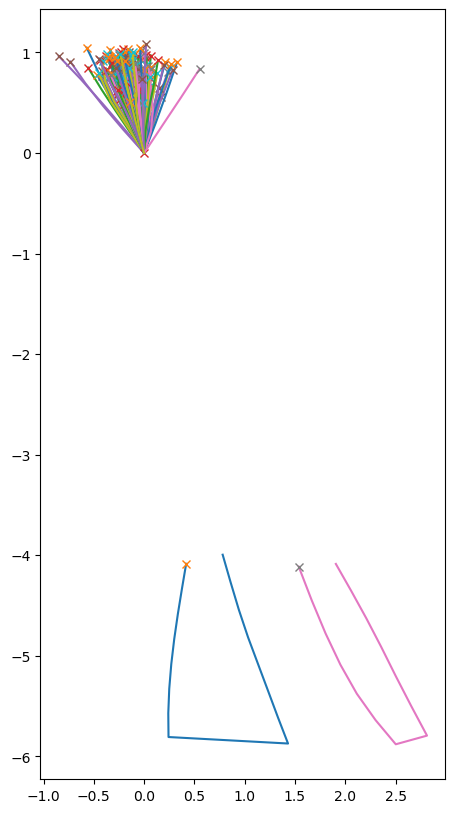

In [17]:

visualizer.show(startingDf, idCol = 'uniqueTrackId', xCol = 'localX', yCol = 'localY')

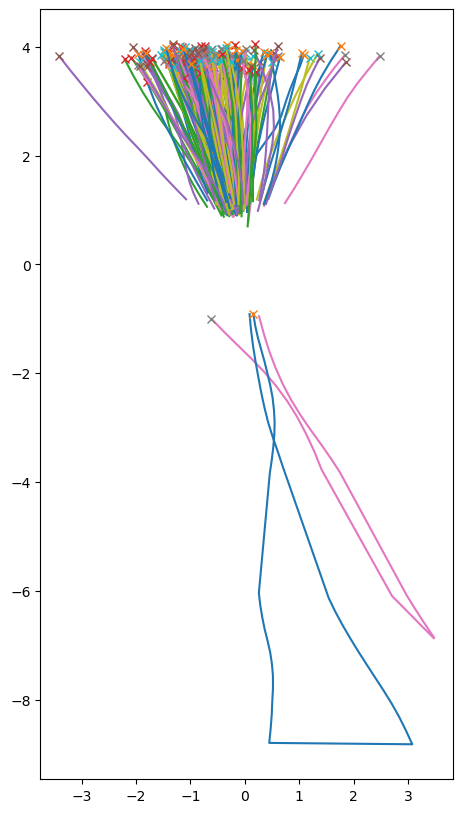

In [22]:
midDf = cleanPedDf[(cleanPedDf["displacementY"] >= 1) & (cleanPedDf["displacementY"] < 4)].copy()
visualizer.show(midDf, idCol = 'uniqueTrackId', xCol = 'localX', yCol = 'localY')

{'whiskers': [<matplotlib.lines.Line2D at 0x24a341de730>,
 'caps': [<matplotlib.lines.Line2D at 0x24a341dec70>,
 'boxes': [<matplotlib.lines.Line2D at 0x24a341d0340>],
 'medians': [<matplotlib.lines.Line2D at 0x24a341ee1f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x24a341ee490>],
 'means': []}

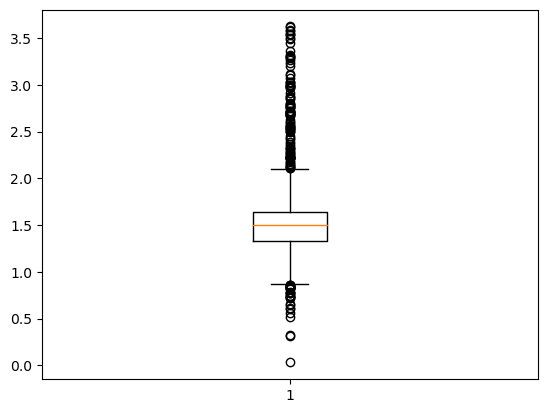

In [23]:
plt.boxplot(midDf["speed"])

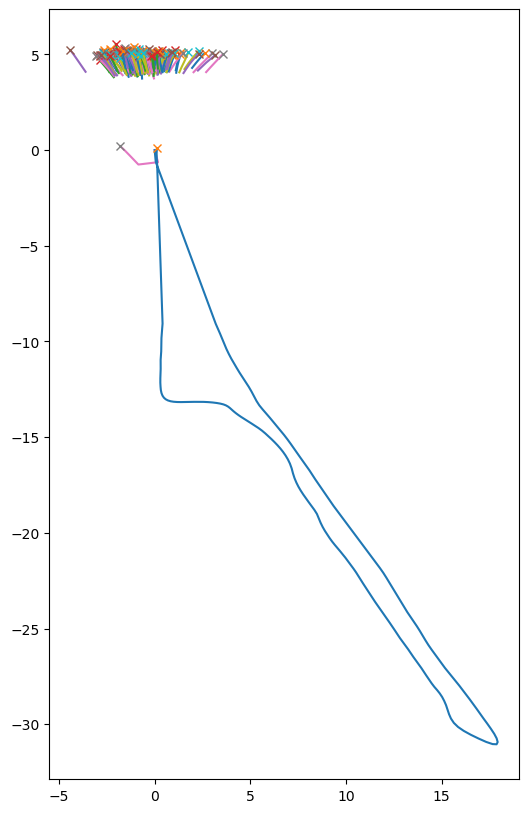

In [24]:
endDf = cleanPedDf[(cleanPedDf["displacementY"] >= 4)].copy()
visualizer.show(endDf, idCol = 'uniqueTrackId', xCol = 'localX', yCol = 'localY')

{'whiskers': [<matplotlib.lines.Line2D at 0x24a3097d790>,
 'caps': [<matplotlib.lines.Line2D at 0x24a3097db80>,
 'boxes': [<matplotlib.lines.Line2D at 0x24a3097d880>],
 'medians': [<matplotlib.lines.Line2D at 0x24a346257f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x24a346259a0>],
 'means': []}

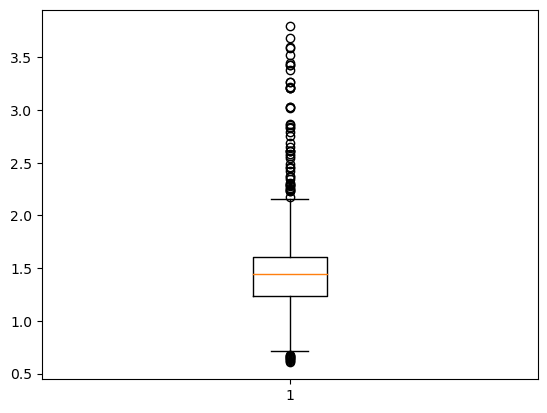

In [25]:
plt.boxplot(endDf["speed"])

<AxesSubplot: xlabel='speed', ylabel='Count'>

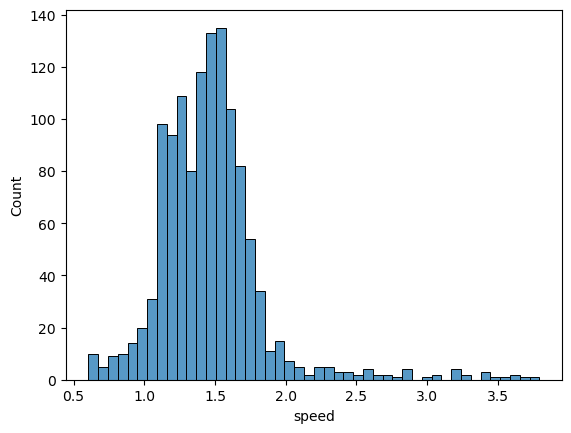

In [26]:
sns.histplot(endDf["speed"])